# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Hypothesis Generation

## Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
1. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
1. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
1. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
1. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
1. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
1. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
1. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

## Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
1. Packaging: Products with good packaging can attract customers and sell more.
1. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
1. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
1. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
1. Advertising: Better advertising of products in the store will should higher sales in most cases.
1. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

## 

## Breakdown of the Problem Statement:
### Supervised machine learning problem.
### The target value will be Item_Outlet_Sales.


# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in csv file train
train = pd.read_csv("Train.csv")
# read in csv file test
test = pd.read_csv("Test.csv")

In [3]:
# explore the first 5 rows of train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# explore the first 5 rows of test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Shape of train and test data
train.shape, test.shape

((8523, 12), (5681, 11))

In [6]:
len(train['Item_Identifier'].unique())

1559

## Number of unique products is 1559 so column Item_Identifier is products.

In [7]:
len(train.Outlet_Identifier.unique())

10

## Number of stores or we can say outlets or Outlet_Identifier is 10.

## Train and Test contains 8523 and 5681 no of data respectively.

## Test data is missing one column that is target variable ( Item_Outlet_Sales )

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### There are missing values in the columns 'Item_Weight', 'Outlet_Size'.
this may be because of 
1. The product not weighted.
2. The outlet size was not entered.

we will see the missing data by values and by percentage.


In [11]:
train['Item_Weight'].dtype, train['Outlet_Size'].dtype

(dtype('float64'), dtype('O'))

In [12]:
test['Item_Weight'].dtype, test['Outlet_Size'].dtype

(dtype('float64'), dtype('O'))

# Handling Missing values

In [13]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
print(f"There are {train['Item_Weight'].isnull().sum()} missing in train and {test['Item_Weight'].isnull().sum()} in test")

print(f"There are {train['Outlet_Size'].isnull().sum()} missing in train and {test['Outlet_Size'].isnull().sum()} in test")


There are 1463 missing in train and 976 in test
There are 2410 missing in train and 1606 in test


In [16]:
print(train.isnull().sum()/train.shape[0] *100,"/n/t")
print(test.isnull().sum()/test.shape[0] *100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 /n/t
Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

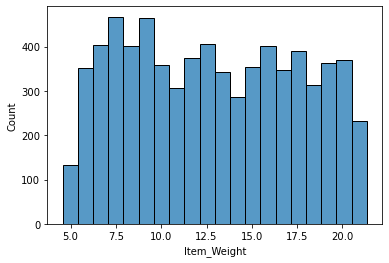

In [17]:
sns.histplot(train['Item_Weight'])

## we can impute Item_Weight missing values by looking at the data that which item has what weight in the data.

In [18]:
def miss_item_weight(df):
    item_avg_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean()
    miss_bool = df['Item_Weight'].isnull() 
    df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])    
    

In [19]:
miss_item_weight(train)
miss_item_weight(test)

In [20]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## still there are unidentified datapoints missing in Item_weight column

## similarly we can see the reference for outlet size by looking at the outlet_type it shows that thee ioutlet size varies accordingly.

In [22]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [24]:
outlet_size_mode = train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)


Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [25]:
miss_bool = train['Outlet_Size'].isnull() 
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [26]:
def miss_outlet_size(df):
    outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
    miss_bool = df['Outlet_Size'].isnull() 
    df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [27]:
miss_outlet_size(train)
miss_outlet_size(test)

In [28]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## We can drop rest 4 null values of item_weight cause they are unique

In [29]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [30]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [31]:
train.nunique()

Item_Identifier              1555
Item_Weight                   446
Item_Fat_Content                5
Item_Visibility              7876
Item_Type                      16
Item_MRP                     5936
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [32]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [34]:
train['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat', inplace=True)
train['Item_Fat_Content'].replace(to_replace='reg',value='Regular', inplace=True)

In [35]:
test['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat', inplace=True)
test['Item_Fat_Content'].replace(to_replace='reg',value='Regular', inplace=True)

In [36]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [37]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## Some of the items such as Household, Health and Hygiene, Others are Non-Consumables

# Univariate Analysis

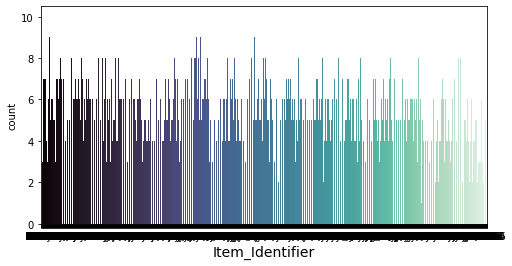

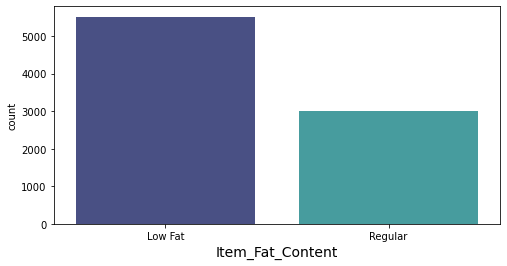

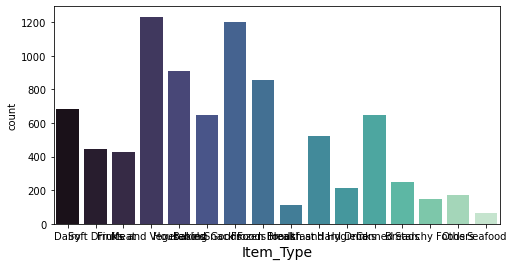

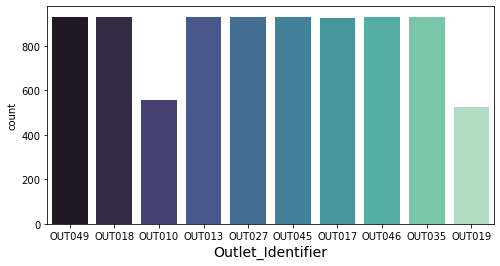

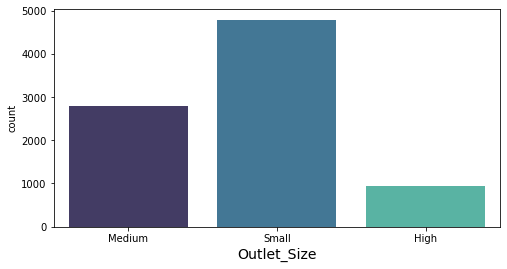

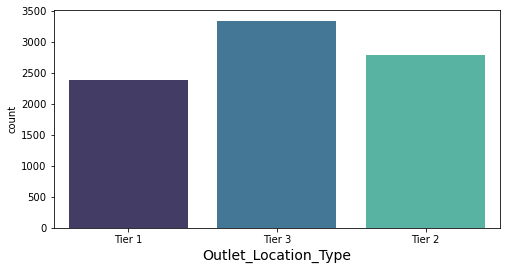

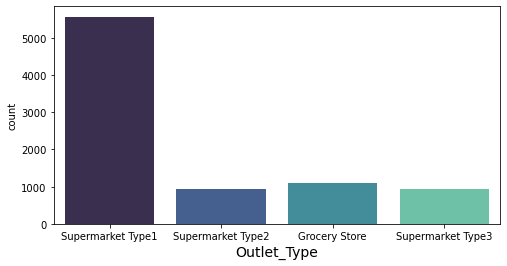

In [38]:
#categorical variables
x = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in x: 
    plt.figure(figsize=(8,4))
    sns.countplot(x = i , data=train , palette='mako')
    plt.xlabel(i, fontsize=14)
    plt.show()

In [39]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [40]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


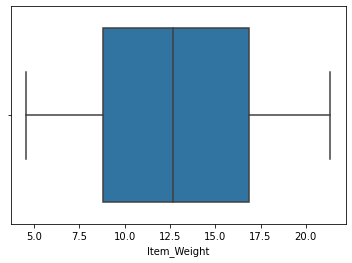

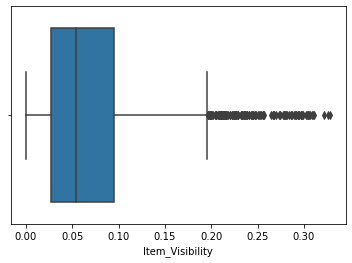

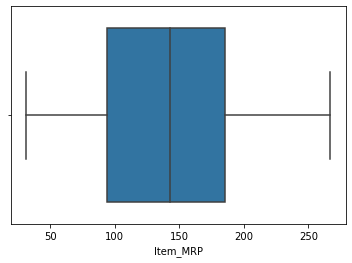

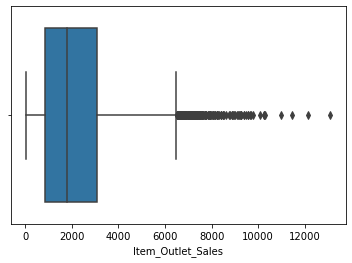

In [41]:
x= ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales' ]
for i in x:
    sns.boxplot(x=i, data=train, orient='h')
    plt.show()

## Bivariate

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

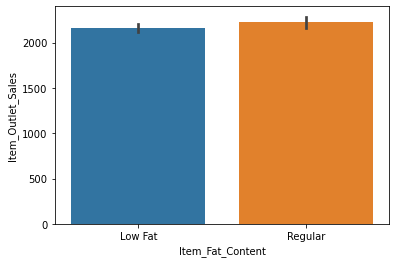

In [42]:
sns.barplot(x = train['Item_Fat_Content'],y = train['Item_Outlet_Sales'])


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

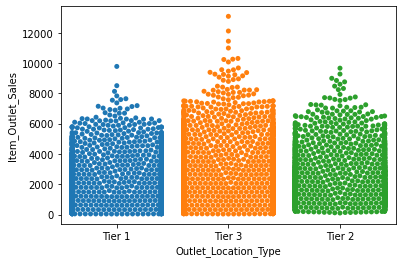

In [43]:
sns.swarmplot(x = train['Outlet_Location_Type'],y = train['Item_Outlet_Sales'])

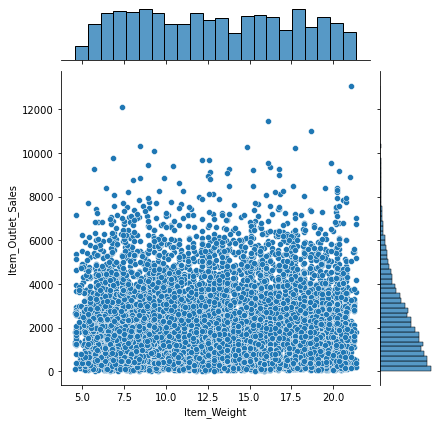

In [44]:
sns.jointplot(x = train['Item_Weight'],y = train['Item_Outlet_Sales'])


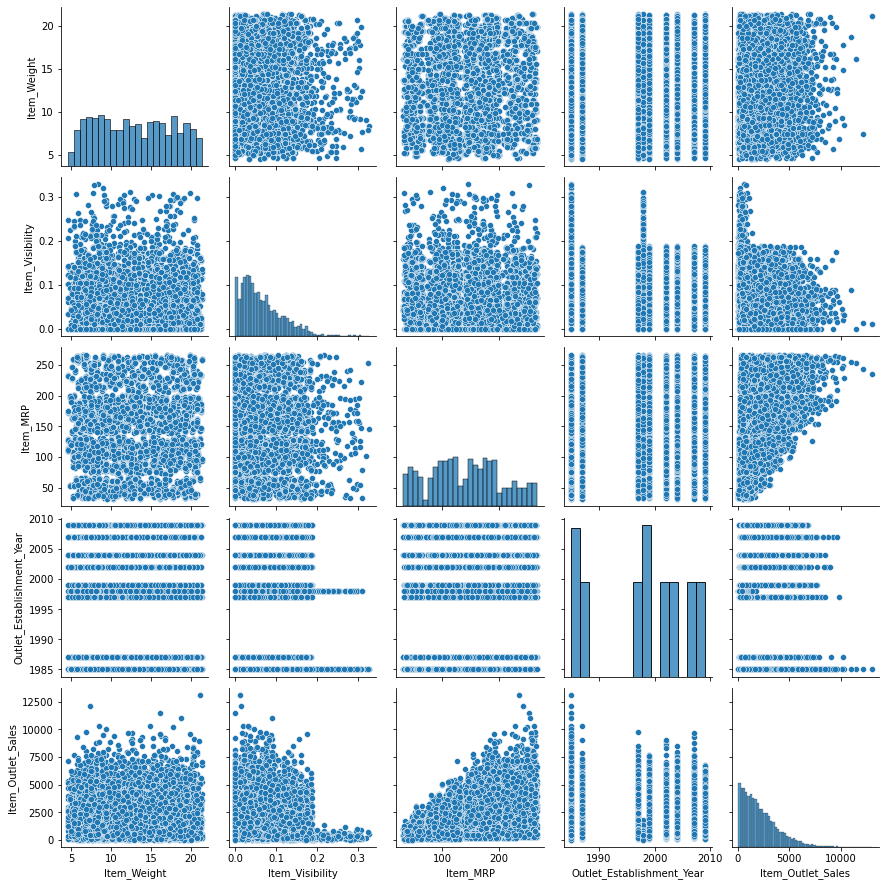

In [45]:
sns.pairplot(data = train)


## Multivariate 

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

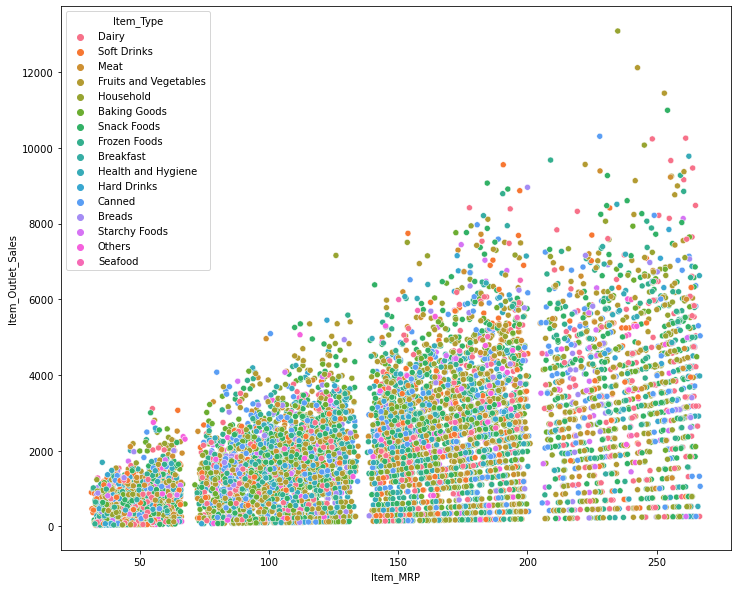

In [46]:
plt.figure(figsize=[12,10])
sns.scatterplot(x = train['Item_MRP'], y = train['Item_Outlet_Sales'], hue=train['Item_Type'])

## So much change in sales and MRP in same item may be because of outlet Region wise Price.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

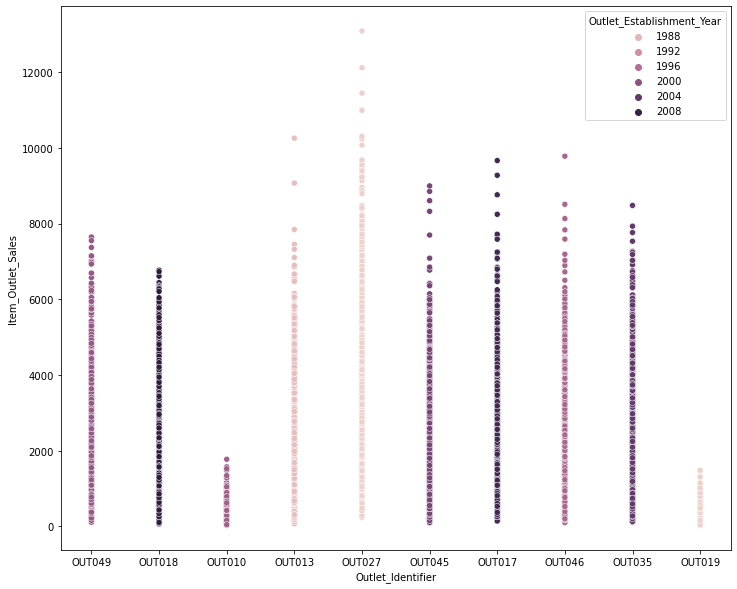

In [47]:
plt.figure(figsize=[12,10])

sns.scatterplot(x = train['Outlet_Identifier'], y = train['Item_Outlet_Sales'], hue=train['Outlet_Establishment_Year'])


## This shows the store before establishment year 1995 has highest sales except OUT019 It has least sales

No handles with labels found to put in legend.


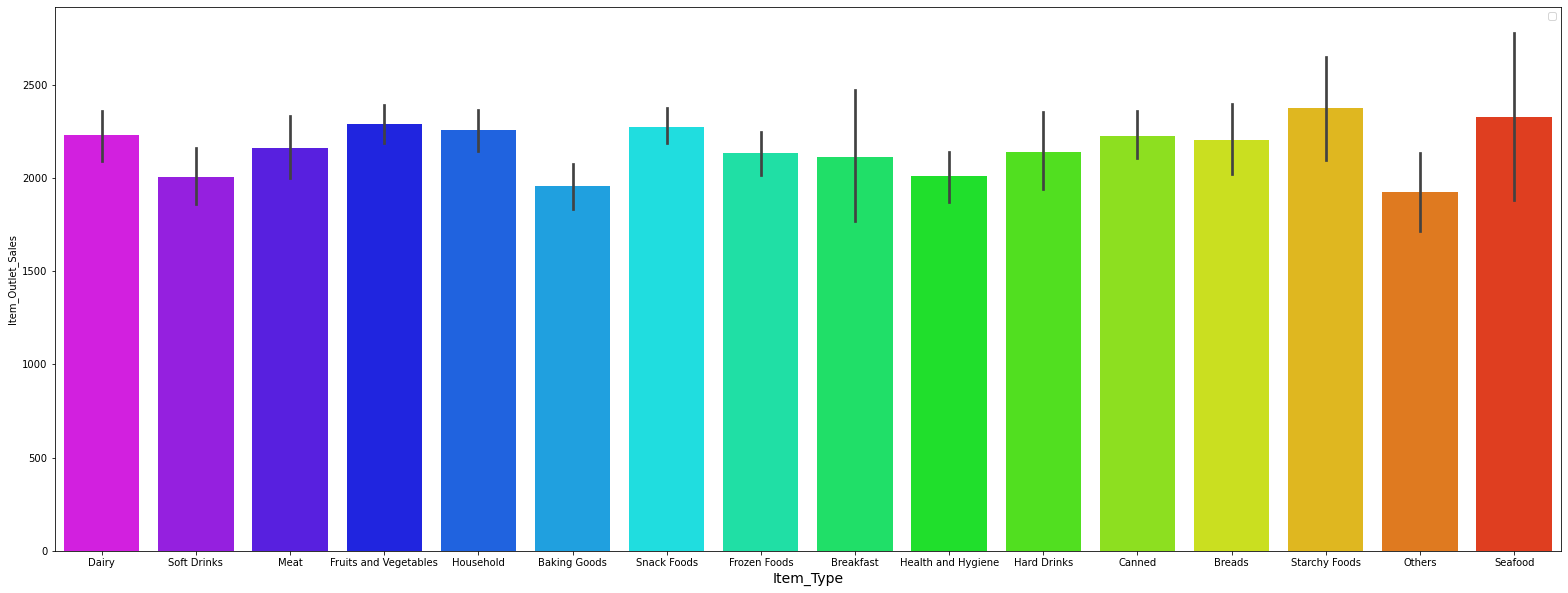

In [48]:
# Sales wrt item types
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


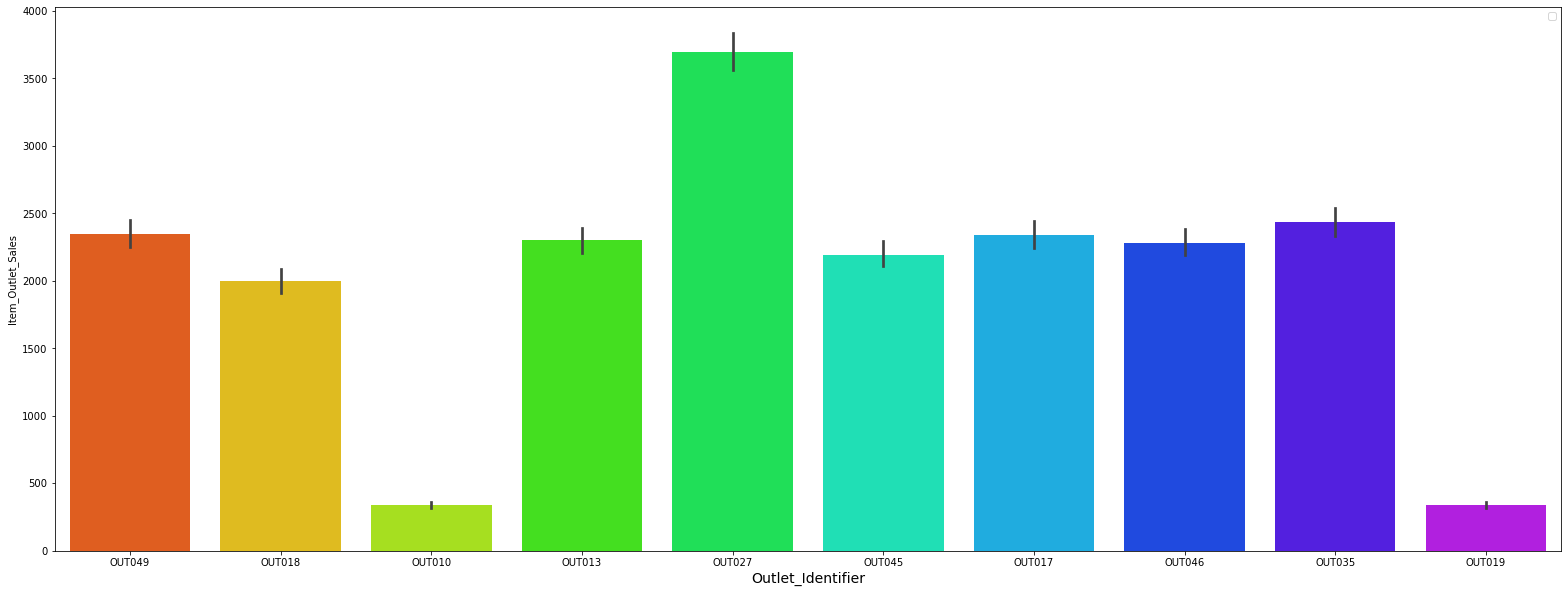

In [49]:
# sales wrt outlet stores

plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

<AxesSubplot:>

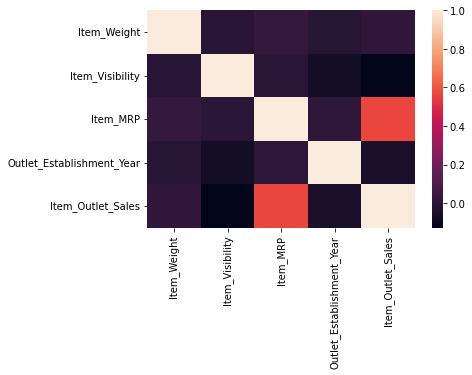

In [50]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket')

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

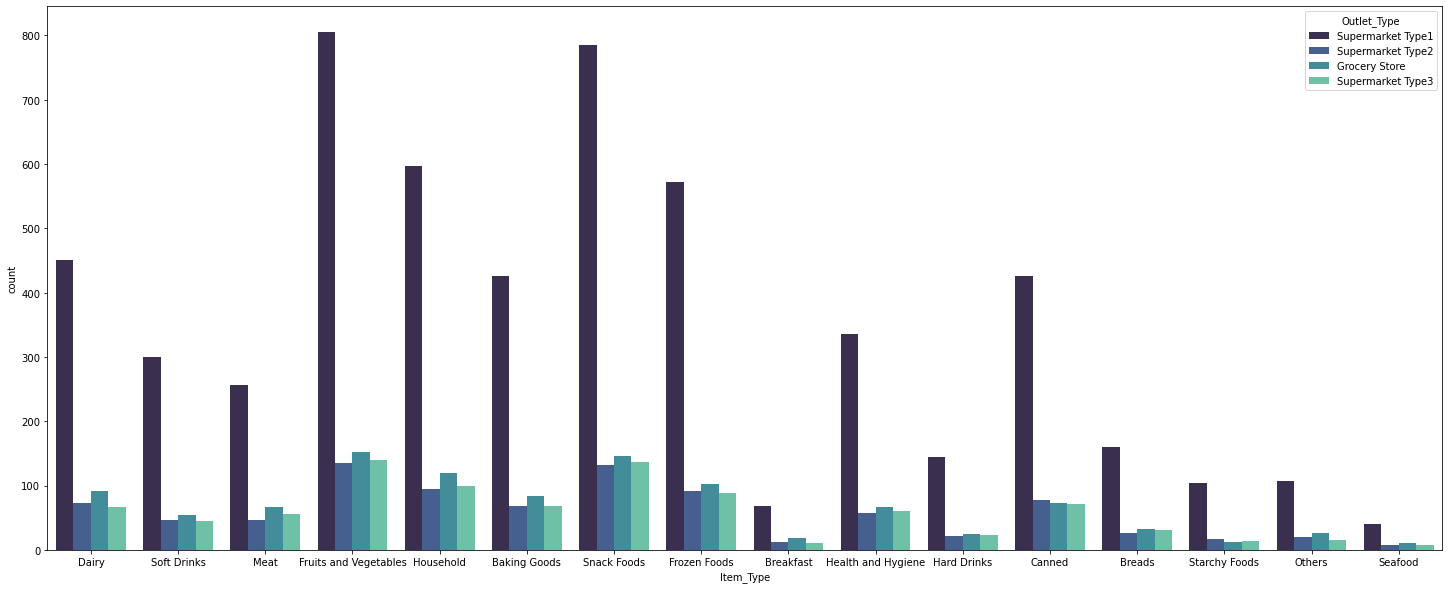

In [51]:
plt.figure(figsize=[25,10])
sns.countplot(x = "Item_Type", data=train, palette='mako', hue='Outlet_Type', orient='v')


# Feature Engineering

In [52]:
def cal_outlet_year(df):
    #Years:
    df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']
    print(df['Outlet_Years'].describe())


In [53]:
cal_outlet_year(train)
cal_outlet_year(test)

count    8519.000000
mean       24.162108
std         8.369105
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64
count    5661.000000
mean       24.125773
std         8.352170
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64


In [54]:
train.drop(columns="Outlet_Establishment_Year", inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,35
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,20
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [55]:
test.drop(columns="Outlet_Establishment_Year", inplace=True)
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,23
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,15
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,24
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,15
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,37
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,25
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,13
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,20
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,15


In [56]:
new = train.groupby(["Item_Identifier","Item_Type"]).size()
new

Item_Identifier  Item_Type         
DRA12            Soft Drinks           6
DRA24            Soft Drinks           7
DRA59            Soft Drinks           8
DRB01            Soft Drinks           3
DRB13            Soft Drinks           5
                                      ..
NCZ30            Household             7
NCZ41            Health and Hygiene    5
NCZ42            Household             5
NCZ53            Health and Hygiene    5
NCZ54            Household             7
Length: 1555, dtype: int64

### As we can see in Item_Identifier the first two letters show the item type description.

DR   ==   Drinks

FD.  ==   Food items

NC.  ==   Non Consumables such as household items

In [57]:
new.dtype

dtype('int64')

In [58]:
train.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8519, dtype: object

In [59]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2]) #Taking first two initials
train['Item_Type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 8519, dtype: object

In [60]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(train['Item_Type_Combined'].value_counts())

Food              6121
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64


In [61]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Type_Combined, Length: 5661, dtype: object

In [62]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(test['Item_Type_Combined'].value_counts())

Food              4058
Non-Consumable    1086
Drinks             517
Name: Item_Type_Combined, dtype: int64


In [63]:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(train['Item_Fat_Content'].value_counts())

Low Fat       3917
Regular       3003
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


In [64]:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(test['Item_Fat_Content'].value_counts())

Low Fat       2568
Regular       2007
Non-Edible    1086
Name: Item_Fat_Content, dtype: int64


In [65]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


In [66]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,23,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,15,Food
2,NCN55,14.600,Non-Edible,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,24,Non-Consumable
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,15,Food
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,37,Food


### Saving the first cleaned csv file

In [67]:
train.to_csv("cleaned_train.csv",index=False)
test.to_csv("cleaned_test.csv", index=False)

## Label Encoding and One-hot Encoding

In [68]:
# read in csv file train
train1 = pd.read_csv("cleaned_train.csv")
# read in csv file test
test1 = pd.read_csv("cleaned_test.csv")

In [69]:
le = LabelEncoder()
Labels = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Labels:
    train1[i] = le.fit_transform(train1[i])
    test1[i] = le.fit_transform(test1[i])

In [70]:
train1['Outlet'] = le.fit_transform(train1['Outlet_Identifier'])
test1['Outlet'] = le.fit_transform(test1['Outlet_Identifier'])

train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,23,Food,9
1,DRC01,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,13,Drinks,3
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,23,Food,9
3,FDX07,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,Grocery Store,732.3800,24,Food,0
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,35,Non-Consumable,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,0,2,Supermarket Type1,2778.3834,35,Food,1
8515,FDS36,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2,1,Supermarket Type1,549.2850,20,Food,7
8516,NCJ29,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2,1,Supermarket Type1,1193.1136,18,Non-Consumable,6
8517,FDN46,7.210,2,0.145221,Snack Foods,103.1332,OUT018,1,2,Supermarket Type2,1845.5976,13,Food,3


In [71]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1,0,Supermarket Type1,23,Food,9
1,FDW14,8.300,2,0.038428,Dairy,87.3198,OUT017,2,1,Supermarket Type1,15,Food,2
2,NCN55,14.600,1,0.099575,Others,241.7538,OUT010,2,2,Grocery Store,24,Non-Consumable,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2,1,Supermarket Type1,15,Food,2
4,FDY38,13.600,2,0.118599,Dairy,234.2300,OUT027,1,2,Supermarket Type3,37,Food,5


In [72]:

train1 = pd.get_dummies(train1, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)
test1 = pd.get_dummies(test1, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)


In [73]:
train1.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)
test1.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)

In [74]:
test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750,0,0.007565,107.8622,23,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.300,2,0.038428,87.3198,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600,1,0.099575,241.7538,24,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315,0,0.015388,155.0340,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,13.600,2,0.118599,234.2300,37,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,10.500,2,0.013496,141.3154,25,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5657,7.600,2,0.142991,169.1448,13,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5658,10.000,1,0.073529,118.7440,20,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5659,15.300,2,0.000000,214.6218,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


## Taking all the features from outlet cause the outlet is giving variation in the prices

### Saving the cleaned data ready for model preparation

In [75]:
train1.to_csv("Train_model_data.csv", index=False)
test1.to_csv("Test_model_data.csv", index=False)

## PreProcessing for model preparation

In [76]:
train2 = pd.read_csv("Train_model_data.csv")
# test2 = pd.read_csv("Test_model_data.csv")

In [77]:
train2.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0,0.016047,249.8092,3735.1380,23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,443.4228,13,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2097.2700,23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,732.3800,24,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,994.7052,35,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [78]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8519 non-null   float64
 1   Item_Fat_Content                   8519 non-null   int64  
 2   Item_Visibility                    8519 non-null   float64
 3   Item_MRP                           8519 non-null   float64
 4   Item_Outlet_Sales                  8519 non-null   float64
 5   Outlet_Years                       8519 non-null   int64  
 6   Outlet_Location_Type_1             8519 non-null   int64  
 7   Outlet_Location_Type_2             8519 non-null   int64  
 8   Outlet_Size_1                      8519 non-null   int64  
 9   Outlet_Size_2                      8519 non-null   int64  
 10  Outlet_Type_Supermarket Type1      8519 non-null   int64  
 11  Outlet_Type_Supermarket Type2      8519 non-null   int64

In [79]:
train2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,...,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.892710,0.066112,141.010019,2181.188779,24.162108,0.326916,0.392886,0.327503,0.563094,...,0.187698,0.109403,0.108698,0.108933,0.061862,0.109403,0.109168,0.109050,0.109168,0.109168
std,4.646098,0.894922,0.051586,62.283594,1706.511093,8.369105,0.469114,0.488421,0.469330,0.496032,...,0.390494,0.312162,0.311278,0.311573,0.240918,0.312162,0.311868,0.311721,0.311868,0.311868
min,4.555000,0.000000,0.000000,31.290000,33.290000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.785000,0.000000,0.026983,93.844900,834.247400,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.650000,1.000000,0.053925,143.047000,1794.331000,23.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.850000,2.000000,0.094558,185.676600,3100.630600,35.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,2.000000,0.328391,266.888400,13086.964800,37.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Assigning Independent and Target variables to X and Y Respectively

In [80]:
X = train2.drop(columns="Item_Outlet_Sales")
Y = train2.Item_Outlet_Sales


### Performing Train_Test_Split for validation of performance of model

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.15)

In [82]:
X_train.shape, X_test.shape


((7241, 23), (1278, 23))

In [83]:
scaled = StandardScaler()
X_train[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X_train[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])


## To avoid data leakage we will use fit_transform in both the train and test data seperately

In [84]:
scaled1 = StandardScaler()
X_test[['Item_Weight','Item_Visibility','Item_MRP',
        'Outlet_Years']] = scaled.fit_transform(X_test[['Item_Weight',
                                                        'Item_Visibility','Item_MRP','Outlet_Years']])


In [85]:
X_train[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
5067,1.011105,2,1.204426,-0.479871,-0.017401,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2794,-1.541995,0,0.198251,-0.892005,-0.017401,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6224,-1.207533,0,-1.286370,0.221786,-1.094351,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
7541,1.333738,0,0.612392,1.492959,-1.333673,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1665,-0.796714,2,-0.361452,-1.449722,-1.333673,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
X_test[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
7498,1.245404,1,-0.629351,-0.113158,-0.741850,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
7842,-1.293474,2,-0.719073,-0.957807,-1.334700,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2571,-0.527918,2,-0.913403,-0.841162,-0.030431,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1084,1.050771,0,-1.111132,0.563341,1.510977,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
856,-0.550625,2,-1.027790,0.945783,-0.741850,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

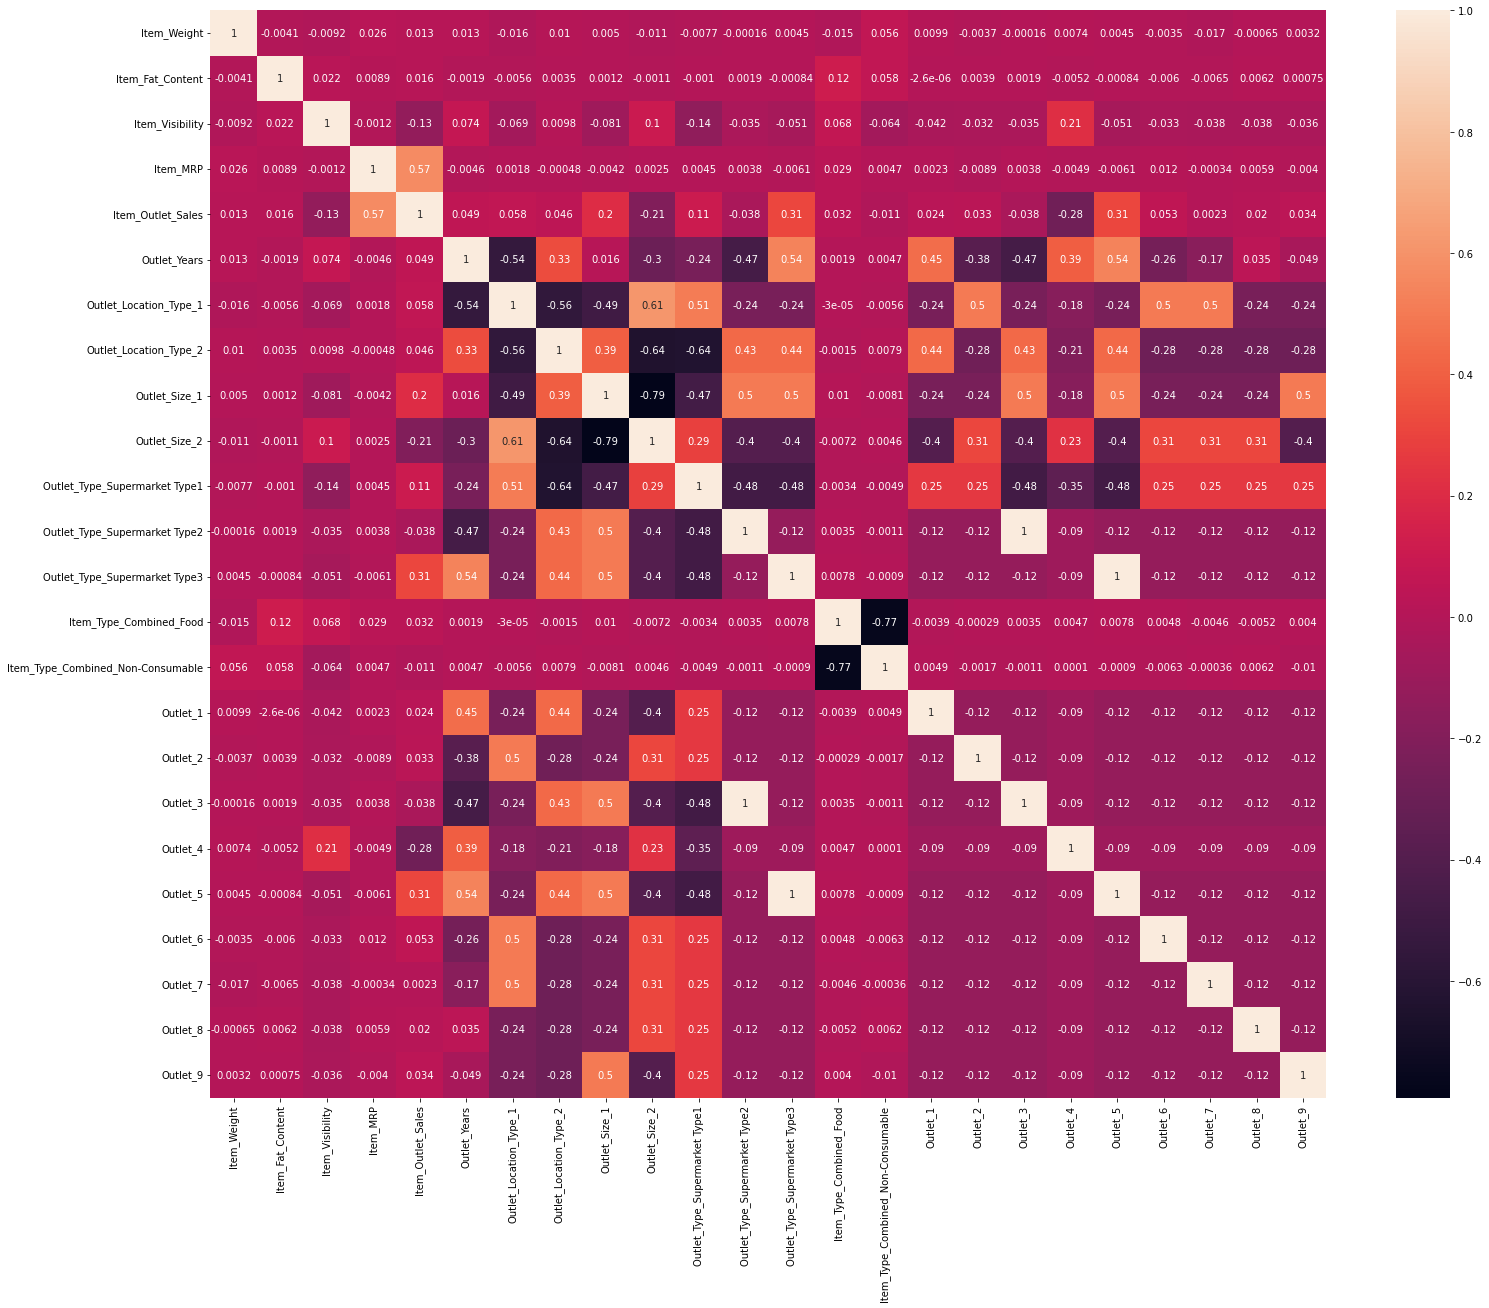

In [87]:
plt.figure(figsize = (25,20))
sns.heatmap(train2.corr(),annot = True)

# Linear Regression

In [88]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

LinearRegression()

In [89]:
def all_scores(model):
    print("Training score", model.score(X_train,Y_train))
    print("Test score", model.score(X_test, Y_test))
    preds = model.predict(X_test)
    print("linear_predicted values: ", preds)
    print("MAE : %.4g" % np.sqrt(mean_absolute_error(Y_test,preds)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_test,preds)))

def cross_validate(model,X,Y, cv):
    cv_score = cross_val_score(model,X=X, y=Y, cv=cv)
    print("cv_scores", cv_score)
    print('cv_score.mean', cv_score.mean())

In [90]:
all_scores(model_linear)

Training score 0.5626410546758114
Test score 0.5671012603187925
linear_predicted values:  [2289.46249721 1078.14464486 -438.68015983 ... 1358.7822974   543.83397839
 2887.93589379]
MAE : 28.71
RMSE : 1119


### Cross_validation of model and mean accuracy 

In [91]:
X = train2.drop(columns="Item_Outlet_Sales")
Y = train2.Item_Outlet_Sales


In [92]:
scaled = StandardScaler()
X[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])


In [93]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.769598,0,-0.970582,1.746938,-0.138865,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.497133,2,-0.907946,-1.489096,-1.333806,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.995427,0,-0.956764,0.009762,-0.138865,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.361347,2,-1.281681,0.659682,-0.019371,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.849240,1,-1.281681,-1.399305,1.295064,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [94]:
cross_validate(model_linear,X, Y,5)

cv_scores [0.57145075 0.55514361 0.54719386 0.56602299 0.56498614]
cv_score.mean 0.5609594698825453


# Regularized Linear Regression

## Ridge Regression

In [95]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=15,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([9.60232866, 2.81075358, 7.13075473, 7.60677887, 1.17750109,
       4.56831234, 9.45182103, 2.21653992, 3.21583388, 1.03984151,
       7.86517571, 3.98145018, 7.84648331, 6.10108966, 6.76118947,
       2.10883169, 0.48388548, 7.68689984, 2.4295914 , 6.36881863,
       5.74818807, 7.32519234, 9.39942941, 9.36009441, 9.86957017,
       3.7109664 , 7.69233306, 9.40299668, 8.34687816, 9.93762851,
       6.54729738, 8.31982317, 9.94217588, 5.37663341, 3.19969391,
       0.96390198, 5.44430875, 1.70648467, 1.66461017, 6.72482678,
       4.95297148, 0.9280571 , 5.7735812 , 1.47014344, 3.53710246,
       6.65955154, 6.20770835, 8.03568114, 2.90384614, 4.81288277]),
        cv=15, normalize=True)

### Using ridgecv to find optimal value of alphas

In [96]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.48388547885294564)

In [97]:
all_scores(ridge_model)

Training score 0.5626409563875561
Test score 0.5671192327347938
linear_predicted values:  [2289.34842592 1078.15230395 -436.76746036 ... 1358.60435551  545.37942977
 2887.76489376]
MAE : 28.71
RMSE : 1119


## Lasso Regression

In [98]:
lassocv= LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True, random_state=42)
lassocv.fit(X_train,Y_train)

LassoCV(cv=10, normalize=True, random_state=42)

In [99]:
lasso_reg = Lasso(alpha=lassocv.alpha_)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.016093233346789356)

In [100]:
all_scores(lasso_reg)

Training score 0.5626410360547518
Test score 0.5670897845027087
linear_predicted values:  [2289.85972879 1078.16564048 -437.18255274 ... 1358.81514056  545.24542339
 2888.29767958]
MAE : 28.71
RMSE : 1119


## Dicission Tree Regression

In [101]:
model_dt = DecisionTreeRegressor()


### Using RandomizedSearchCV for Hyper-Parameter Tuning 

In [102]:
params = {
    'max_depth': [2, 3, 4, 5, 8, 10, 12, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["squared_error", "absolute_error"],
    'max_features':["sqrt","auto","log2", 0.2, None]
}
random_search = RandomizedSearchCV(estimator=model_dt,param_distributions=params,cv=10,n_iter=10)


In [103]:
random_search.fit(X_train,Y_train)


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 8, 10, 12,
                                                      15],
                                        'max_features': ['sqrt', 'auto', 'log2',
                                                         0.2, None],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             150]})

#### Best Parameters

In [104]:
random_search.best_params_

{'min_samples_leaf': 100,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'squared_error'}

### Fitting a the model with best params

In [105]:
model_dt = DecisionTreeRegressor(max_depth=10,max_features=None, 
                                 min_samples_leaf=100, criterion='squared_error')

In [106]:
model_dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)

### Performance of model in train and test 

In [107]:
all_scores(model_dt)

Training score 0.615251350649697
Test score 0.6030423526217048
linear_predicted values:  [2318.16980438 1261.98087211  213.99035798 ... 1261.98087211  368.65211946
 3052.34115447]
MAE : 27.32
RMSE : 1072


### Cross_validation of model and mean accuracy 

In [108]:
model_DT = DecisionTreeRegressor(max_depth=10,max_features=None, 
                                 min_samples_leaf=100, criterion='squared_error')
model_DT.fit(X,Y)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)

In [109]:
cross_validate(model_DT,X, Y,10)

cv_scores [0.59481872 0.61383934 0.55811126 0.603635   0.5316119  0.61113859
 0.60986259 0.59655827 0.62961139 0.56596887]
cv_score.mean 0.591515594398333


## Random Forest Regressor

In [110]:
model_Rf = RandomForestRegressor()
model_Rf.fit(X_train,Y_train)

RandomForestRegressor()

In [111]:
all_scores(model_Rf)

Training score 0.9378972910961156
Test score 0.5683516484248969
linear_predicted values:  [2432.693382 1133.078414  171.516738 ... 1395.476852  341.75514
 2833.931094]
MAE : 27.93
RMSE : 1117


### As we can see it is overfitting so we do Hyper-Parameter tuning

### Using RandomizedSearchCV for Hyper-Parameter Tuning 

In [112]:
param = {
    'max_depth':[3,6,9,12],
    'n_estimators' : [10,50,100,200] 
}

In [113]:
random_search = RandomizedSearchCV(model_Rf, param_distributions=param,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)


In [114]:
random_search.fit(X_train,Y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

#### Best Parameters

In [115]:
random_search.best_params_

{'n_estimators': 10, 'max_depth': 6}

### Fitting a the model with best params

In [116]:
model_Rf = RandomForestRegressor(n_estimators=200, max_depth=6)

In [117]:
model_Rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [118]:
all_scores(model_Rf)

Training score 0.6332379470188833
Test score 0.6015227579895992
linear_predicted values:  [2132.84870282 1204.67485469  234.95533539 ... 1316.12402132  368.25023625
 3187.30899624]
MAE : 27.24
RMSE : 1074


### Cross_validation of model and mean accuracy 

In [119]:
cross_validate(model_Rf, X, Y, 20)

cv_scores [0.59816654 0.6015886  0.61591346 0.62824295 0.58373112 0.52869635
 0.58383555 0.62392286 0.5512371  0.51389155 0.66216769 0.56190073
 0.62107777 0.62174711 0.62616233 0.56734882 0.63461978 0.62157499
 0.58284248 0.57086346]
cv_score.mean 0.5949765624609096


# XGBoost Regression

In [120]:
model_XGB = XGBRegressor()


### Using RandomizedSearchCV for Hyper-Parameter Tuning 

In [121]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "learning_rate": [.03, 0.05, .07]   
}

In [122]:
random_search = RandomizedSearchCV(model_XGB, param_distributions=params,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)


In [123]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.03, 0.05, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

#### Best Parameters

In [124]:
random_search.best_score_

0.5942150039761064

In [125]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

### Fitting a the model with best params

In [126]:
model_XGB =  XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)

In [127]:
model_XGB.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [128]:
all_scores(model_XGB)

Training score 0.60561491822476
Test score 0.5804437593976612
linear_predicted values:  [2105.3918  1178.6677   239.7196  ... 1447.637    546.29584 2797.8433 ]
MAE : 27.6
RMSE : 1102


### Cross_validation of model and mean accuracy 

In [129]:
cross_validate(model_XGB, X_train, Y_train, 10)

cv_scores [0.56018721 0.58928721 0.58332069 0.57553692 0.58068871 0.56356481
 0.55970059 0.58000123 0.58754003 0.54667319]
cv_score.mean 0.5726500600252946


## Fitting in full training data

In [130]:
model_XGB2 = XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)
model_XGB2.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [131]:
model_XGB2.score(X,Y)

0.6046327515668822

In [132]:
cross_validate(model_XGB2, X, Y, 10)

cv_scores [0.56247483 0.58824272 0.54941123 0.58190686 0.5470967  0.58319339
 0.59432407 0.56781437 0.60006779 0.56068518]
cv_score.mean 0.5735217162515001


## Gradient Boosting Regression

In [133]:
model_GBR = GradientBoostingRegressor()

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": [.03, 0.05, .07,0.5,1],
}

### Using RandomizedSearchCV for Hyper-Parameter Tuning 

In [134]:
search_cv = RandomizedSearchCV(model_GBR, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2)

In [135]:
search_cv.fit(X_train, Y_train)

[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.488 total time=   1.6s
[CV 1/5] END ....max_depth=12, n_estimators=200;, score=0.578 total time=   8.1s
[CV 1/5] END ......max_depth=6, n_estimators=10;, score=0.597 total time=   0.2s
[CV 3/5] END ......max_depth=6, n_estimators=10;, score=0.591 total time=   0.2s
[CV 5/5] END ......max_depth=6, n_estimators=10;, score=0.586 total time=   0.2s
[CV 2/5] END .....max_depth=12, n_estimators=50;, score=0.579 total time=   2.7s
[CV 5/5] END .....max_depth=12, n_estimators=50;, score=0.564 total time=   3.8s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.07, max_depth=15, min_child_weight=1;, score=0.515 total time=   3.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.07, max_depth=15, min_child_weight=1;, score=0.523 total time=   4.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.07, max_depth=5, min_child_weight=1;, score=0.586 total time=   1.6s
[CV 4/5] END colsample_bytree=0.3, gam

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=20, n_jobs=2,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.07, 0.5,
                                                          1],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=0, scoring='neg_mean_absolute_error')

### Best parameters

In [136]:
search_cv.best_params_

{'n_estimators': 200, 'max_leaf_nodes': 5, 'learning_rate': 0.07}

### Fitting a the model with best params

In [137]:
model_GBR = GradientBoostingRegressor(n_estimators=200,max_leaf_nodes=5,learning_rate=0.07)
model_GBR.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.07, max_leaf_nodes=5,
                          n_estimators=200)

In [138]:
all_scores(model_GBR)

Training score 0.6284137790960271
Test score 0.5920992299324455
linear_predicted values:  [2177.26232815 1120.15346009  510.88967291 ... 1452.79606476  348.97899369
 3136.72739905]
MAE : 27.57
RMSE : 1086


### Cross_validation of model and mean accuracy 

In [139]:
cross_validate(model_GBR, X_train, Y_train, 10)

cv_scores [0.5758955  0.60371413 0.60494638 0.59343559 0.59510049 0.58362515
 0.56752393 0.60846018 0.60435932 0.56636385]
cv_score.mean 0.5903424539790292


# All scores of all models

In [140]:
print("Linear Regression   :",
      "Train_score:",model_linear.score(X_train,Y_train),
      " Test_score:", model_linear.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_linear.predict(X_test))))

print("Ridge Regression    :",
      "Train_score:",ridge_model.score(X_train,Y_train),
      " Test_score:",ridge_model.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,ridge_model.predict(X_test))))

print("Lasso Regression    :",
      "Train_score:",lasso_reg.score(X_train,Y_train),
      " Test_score:",lasso_reg.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,lasso_reg.predict(X_test))))

print("Decission Tree      :",
      "Train_score:",model_dt.score(X_train,Y_train),
      "  Test_score:",model_dt.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_dt.predict(X_test))))

print("RandomForest        :",
      "Train_score:",model_Rf.score(X_train,Y_train)   ,
      "  Test_score:",model_Rf.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_Rf.predict(X_test))))

print("XGBoost Regression  :",
      "Train_score:",model_XGB.score(X_train,Y_train)   ,
      "   Test_score:",model_XGB.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_XGB.predict(X_test))))

print("GradientBoosting    :",
      "Train_score:",model_GBR.score(X_train,Y_train),
      " Test_score:",model_GBR.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_GBR.predict(X_test))))


Linear Regression   : Train_score: 0.5626410546758114  Test_score: 0.5671012603187925 MAE: 28.71
Ridge Regression    : Train_score: 0.5626409563875561  Test_score: 0.5671192327347938 MAE: 28.71
Lasso Regression    : Train_score: 0.5626410360547518  Test_score: 0.5670897845027087 MAE: 28.71
Decission Tree      : Train_score: 0.615251350649697   Test_score: 0.6030423526217048 MAE: 27.32
RandomForest        : Train_score: 0.6332379470188833   Test_score: 0.6015227579895992 MAE: 27.24
XGBoost Regression  : Train_score: 0.60561491822476    Test_score: 0.5804437593976612 MAE: 27.6
GradientBoosting    : Train_score: 0.6284137790960271  Test_score: 0.5920992299324455 MAE: 27.57


## Here Decission Tree regression gives best fit wrt Train and Test score and MAE .

# Predictions

## Lets fit Decission tree model on All the data of training set and give the predictions for Test dataset

In [141]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model_DT, open(filename, 'wb'))
 

In [142]:
test_data = pd.read_csv("Test_model_data.csv")

In [143]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750,0,0.007565,107.8622,23,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.300,2,0.038428,87.3198,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600,1,0.099575,241.7538,24,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315,0,0.015388,155.0340,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,13.600,2,0.118599,234.2300,37,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,10.500,2,0.013496,141.3154,25,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5657,7.600,2,0.142991,169.1448,13,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5658,10.000,1,0.073529,118.7440,20,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5659,15.300,2,0.000000,214.6218,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [144]:
scaled = StandardScaler()
test_data[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(test_data[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])


In [145]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,1.733684,0,-1.133394,-0.535470,-0.134800,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.939626,2,-0.531662,-0.868272,-1.092720,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0.413134,1,0.660523,1.633672,-0.015060,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,-1.151129,0,-0.980859,0.228747,-1.092720,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0.198410,2,1.031441,1.511781,1.541559,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,-0.467234,2,-1.017745,0.006496,0.104680,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5657,-1.089932,2,1.507003,0.457353,-1.332199,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5658,-0.574595,1,0.152698,-0.359177,-0.494020,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5659,0.563440,2,-1.280885,1.194114,-1.092720,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [146]:
loaded_model = pickle.load(open(filename, 'rb'))

In [147]:
loaded_model.feature_importances_

array([0.00272707, 0.00135747, 0.00460122, 0.54240348, 0.        ,
       0.        , 0.        , 0.00145176, 0.08908472, 0.16269858,
       0.        , 0.17713974, 0.        , 0.        , 0.        ,
       0.        , 0.01684772, 0.        , 0.        , 0.        ,
       0.00168823, 0.        , 0.        ])

In [148]:
loaded_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [149]:
predictions = loaded_model.predict(test_data)

In [150]:
test_data["predictions"] = predictions

In [151]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,predictions
0,1.733684,0,-1.133394,-0.535470,-0.134800,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1686.984856
1,-0.939626,2,-0.531662,-0.868272,-1.092720,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1444.603847
2,0.413134,1,0.660523,1.633672,-0.015060,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,584.757765
3,-1.151129,0,-0.980859,0.228747,-1.092720,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,2316.359577
4,0.198410,2,1.031441,1.511781,1.541559,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,6280.890880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,-0.467234,2,-1.017745,0.006496,0.104680,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2267.656904
5657,-1.089932,2,1.507003,0.457353,-1.332199,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,2210.535896
5658,-0.574595,1,0.152698,-0.359177,-0.494020,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1800.900573
5659,0.563440,2,-1.280885,1.194114,-1.092720,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,3627.549891


In [152]:
test_data['predictions'].describe()

count    5661.000000
mean     2183.732020
std      1348.505182
min       125.615417
25%      1141.290033
50%      2166.916521
75%      3192.647893
max      6280.890880
Name: predictions, dtype: float64